# QUESTION 3

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

sns.set(style="white", color_codes=True)

In [2]:
# load iris dataset
iris = load_iris()

# Create dataframe and display it
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

# Get the species of Iris
target_df = pd.DataFrame(iris.target).rename(columns = {0: 'target'})
df = pd.concat([iris_df, target_df], axis=1)
df.loc[(df.target == 0),'target'] = iris.target_names[0]
df.loc[(df.target == 1),'target'] = iris.target_names[1]
df.loc[(df.target == 2),'target'] = iris.target_names[2]

df.shape

(150, 5)

# Visualizing the data

After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a setosa is distinctly different from those of the other two species.

There is some overlap in the pairwise relationships of the other two species, versicolor and virginica.

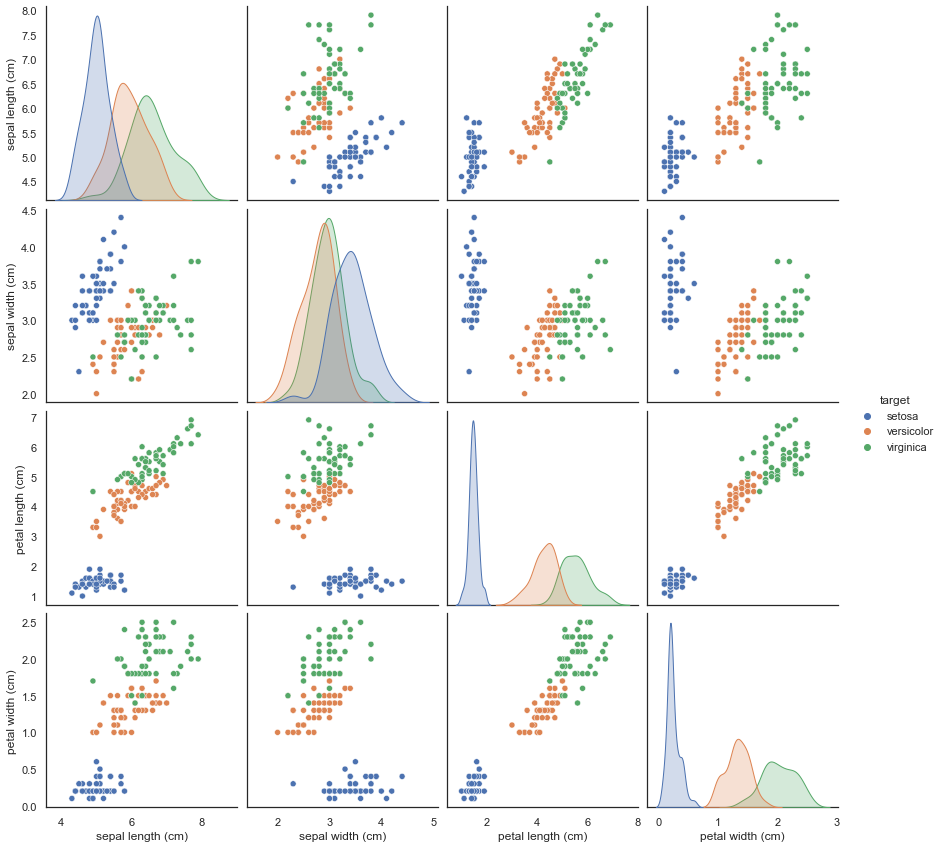

In [3]:
sns.pairplot(df, hue='target', height=3)
plt.show()

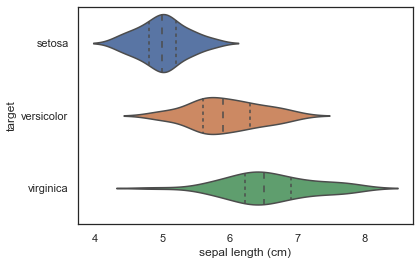

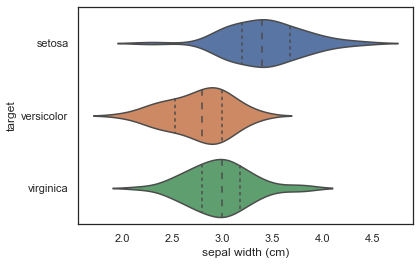

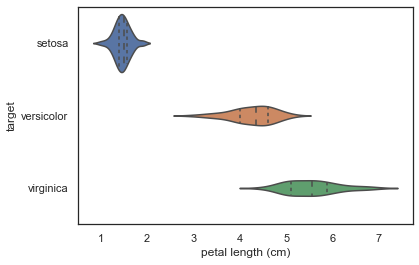

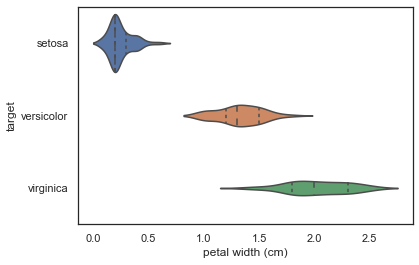

In [4]:
g = sns.violinplot(y='target', x='sepal length (cm)', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='target', x='sepal width (cm)', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='target', x='petal length (cm)', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='target', x='petal width (cm)', data=df, inner='quartile')
plt.show()

By using a correlation matrix, we can observe the relationship between a feature and the target. 

In [5]:
corr_matrix = df.corr(method='pearson')

upper_corr_matrix = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_matrix.unstack().dropna()
  
# Sort correlation pairs
sorted_matrix = unique_corr_pairs.sort_values(ascending=False)
print(sorted_matrix)

petal width (cm)   petal length (cm)    0.962865
petal length (cm)  sepal length (cm)    0.871754
petal width (cm)   sepal length (cm)    0.817941
sepal width (cm)   sepal length (cm)   -0.117570
petal width (cm)   sepal width (cm)    -0.366126
petal length (cm)  sepal width (cm)    -0.428440
dtype: float64


The two features that has the highest positive correlation to our target is **petal width (cm)** and **petal length (cm)**.

### Data Checking

Before modelling, we check our data on **petal width (cm)** and **petal length (cm)** for null values to ensure that our trained model is accurate.

In [6]:
# Check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

For the classes, we are choosing **"versicolor"** and **"virginica"** because "setosa" has the lowest entropy against the other two classes, making it hard to determine models' efficacy.

In [7]:
# select classes

selected_classes = ['versicolor', 'virginica']
new_df = df.loc[df['target'].isin(selected_classes)]
new_df # 100 x 5

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Modeling

We will create a Logistic Regression model that will predict the species of the flower features. We will split our data 80% train data and 20% test data.

In [8]:
label_encoder = LabelEncoder()

X = new_df.iloc[:,0:4]
y = label_encoder.fit_transform(new_df['target'])

By stratifying on y we assure that the different classes are represented proportionally to the amount in the total data (this makes sure that all of class 1 is not in the test group only)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

Fitting our model in the train data and use it to predict on our y_test data.

In [10]:
pipeline = Pipeline([('estimator', LogisticRegression())])
scores = cross_val_score(pipeline, X_train, y_train, cv=KFold(n_splits=3))

print('Mean score: %2f' %(scores.mean()))
print("Standard deviation score: ", scores.std())

model = pipeline.fit(X_train, y_train)

Mean score: 0.938272
Standard deviation score:  0.04619330107128324


In [11]:
y_pred = model.predict(X_test)
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Accuracy (F1 score): %.2f"% metrics.f1_score(y_pred, y_test))

Accuracy: 0.90
Accuracy (F1 score): 0.89


Our model has a 90% accuracy on predicting the target

### 3b) Implement a Naive Bayes classifier for the Iris dataset

In [12]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred2 = classifier.predict(X_test)
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred2, y_test))
print("Accuracy (F1 score): %.2f" % metrics.f1_score(y_pred2, y_test))

Accuracy: 0.95
Accuracy (F1 score): 0.95


In [13]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)

confusion_matrix

array([[10,  0],
       [ 1,  9]])

From the confusion matrix we can see that there are 10 true positives, 0 false positives, 1 false negative and 9 true negative.

There are a total of 19 correct predictions and 1 incorrect prediction.

### 3c) Compare the performance metrics of the algorithm in Question 3(a) and Naïve Bayes classifier. Does the scaling of the parameters have any impact on the performance? (Justify your answer)

From 3a) the logistic regression model has a 90% acurracy on the test data, however the Naive Bayes classifier has a better accuracy of 95%.

In [14]:
# scale data

scaler = StandardScaler()
X1_train = scaler.fit_transform(X_train)
X1_test = scaler.transform(X_test)

In [17]:
line = '-'*40

# -------- Without Scaling -------- #
clf = LogisticRegression(max_iter=150)
scores1 = cross_val_score(clf, X_train, y_train, cv=KFold(n_splits=4))
clf.fit(X_train, y_train)

print(line)
print(f'Logistic regression without scaling')
print(line)
print('Mean score: %2f' %(scores1.mean()))
print("Standard deviation score: ", scores1.std())
print(f'Prediction accuracy (F1 score): {metrics.f1_score(clf.predict(X_test), y_test) * 100}%', end='\n\n')
# --------------------------------- #

# ----------- With Scaling -------- #
clf1 = LogisticRegression(penalty='l2',max_iter=150)
scores2 = cross_val_score(clf1, X1_train, y_train, cv=KFold(n_splits=4))
clf1.fit(X1_train, y_train)

print(line)
print(f'Logistic regression with scaling')
print(line)
print('Mean score: %2f' %(scores2.mean()))
print("Standard deviation score: ", scores2.std())
print(f'Prediction accuracy (F1 score): {metrics.f1_score(clf1.predict(X_test), y_test) * 100}%', end='\n\n')
# --------------------------------- #


----------------------------------------
Logistic regression without scaling
----------------------------------------
Mean score: 0.925000
Standard deviation score:  0.08291561975888498
Prediction accuracy (F1 score): 88.8888888888889%

----------------------------------------
Logistic regression with scaling
----------------------------------------
Mean score: 0.900000
Standard deviation score:  0.07071067811865474
Prediction accuracy (F1 score): 66.66666666666666%



As we can observe, scaling of features does not improve the cross validation and prediction accuracy for the the logistic regression

In [16]:
# -------- Without Scaling -------- #
pipeline3 = Pipeline([('estimator', GaussianNB())])
scores3 = cross_val_score(pipeline3, X_train, y_train, cv=KFold(n_splits=3))
pipeline3.fit(X_train, y_train)
# --------------------------------- #

# ----------- With Scaling -------- #
pipeline4 = Pipeline([('scale', StandardScaler()), ('estimator', GaussianNB())])
scores4 = cross_val_score(pipeline4, X_train, y_train, cv=KFold(n_splits=3))
pipeline4.fit(X1_train, y_train)
# --------------------------------- #

print(line)
print(f'Naive Bayes without scaling')
print(line)

print('Mean score: %2f' %(scores3.mean()))
print("Standard deviation score: ", scores3.std())
print(f'Prediction accuracy: {pipeline3.score(X_test, y_test) * 100}%')
print(f'Prediction accuracy (F1 score): {metrics.f1_score(pipeline3.predict(X_test), y_test) * 100}%', end='\n\n')

print(line)
print(f'Naive Bayes with scaling')
print(line)
print('Mean score: %2f' %(scores4.mean()))
print("Standard deviation score: ", scores4.std())
print(f'Prediction accuracy: {pipeline4.score(X1_test, y_test) * 100}%')
print(f'Prediction accuracy (F1 score): {metrics.f1_score(pipeline4.predict(X_test), y_test) * 100}%', end='\n\n')

----------------------------------------
Naive Bayes without scaling
----------------------------------------
Mean score: 0.938272
Standard deviation score:  0.04619330107128324
Prediction accuracy: 95.0%
Prediction accuracy (F1 score): 94.73684210526316%

----------------------------------------
Naive Bayes with scaling
----------------------------------------
Mean score: 0.938272
Standard deviation score:  0.04619330107128324
Prediction accuracy: 95.0%
Prediction accuracy (F1 score): 66.66666666666666%



The scaling of the parameters did not make a difference for the Naive Bayes classifier on the cross validation scores. This is because standardization changes the mean and standard deviation, however probabilities stay exactly the same.

# DONE -------------------------------------------------------